In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:95% !important; }div.output_wrapper .output { padding-left: 14px; }</style>"))

# Maybe it's worth it to try to use these on colored data. <br><br>Also use the approaches here, visualizing the images and possibly training with a classifier, for the autoencoder. If tensorboard won't run locally, use the online version. I just wanna see if this thing works. <br><br>Also-also, once this is done, it should go on your Github page. <br><br>Also-also-also, AFTER all this is done, start working on GAN's. And that needs to be FINISHED.<br><br> Also, if you feel up to it, try to set up an EC2 instance with superset. Just to put your knowledge to the test. Not for any practical reason.

In [2]:
import tfrbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [3]:
import logging
logging.basicConfig(level=logging.INFO)

# Tensorflow library
https://github.com/meownoid/tensorflow-rbm <br>
https://github.com/meownoid/tensorflow-rbm/blob/master/examples/mnist.py <br><br>
This RBM doesn't need to be trained with a classifier. Requires tuning.

In [4]:
def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    def shift(x, w):
        return convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()

    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

In [5]:
# Load Data
X, y = datasets.load_digits(return_X_y=True)
X = np.asarray(X, 'float32')
X, Y = nudge_dataset(X, y)
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

In [6]:
#X_train = X_train / 255.
dataset  = tf.data.Dataset.from_tensor_slices(X_train.astype("float32"))
dataset = dataset.shuffle(1024, reshuffle_each_iteration = True)

In [93]:
X_train.shape[1]

64

In [8]:
from tfrbm import BBRBM
# n_visible should equal the number of features.
rbm = BBRBM(n_visible = 8*8, n_hidden = 10)
rbm.fit(dataset, epoches = 50, batch_size = 10)

INFO:BBRBM:Starting epoch 0
INFO:BBRBM:Epoch error: 0.151986
INFO:BBRBM:Starting epoch 1
INFO:BBRBM:Epoch error: 0.114358
INFO:BBRBM:Starting epoch 2
INFO:BBRBM:Epoch error: 0.103622
INFO:BBRBM:Starting epoch 3
INFO:BBRBM:Epoch error: 0.099058
INFO:BBRBM:Starting epoch 4
INFO:BBRBM:Epoch error: 0.096049
INFO:BBRBM:Starting epoch 5
INFO:BBRBM:Epoch error: 0.093164
INFO:BBRBM:Starting epoch 6
INFO:BBRBM:Epoch error: 0.090481
INFO:BBRBM:Starting epoch 7
INFO:BBRBM:Epoch error: 0.087659
INFO:BBRBM:Starting epoch 8
INFO:BBRBM:Epoch error: 0.085481
INFO:BBRBM:Starting epoch 9
INFO:BBRBM:Epoch error: 0.083146
INFO:BBRBM:Starting epoch 10
INFO:BBRBM:Epoch error: 0.081565
INFO:BBRBM:Starting epoch 11
INFO:BBRBM:Epoch error: 0.080048
INFO:BBRBM:Starting epoch 12
INFO:BBRBM:Epoch error: 0.078958
INFO:BBRBM:Starting epoch 13
INFO:BBRBM:Epoch error: 0.077877
INFO:BBRBM:Starting epoch 14
INFO:BBRBM:Epoch error: 0.076935
INFO:BBRBM:Starting epoch 15
INFO:BBRBM:Epoch error: 0.075985
INFO:BBRBM:Startin

[0.19133548438549042,
 0.18752966821193695,
 0.1887601613998413,
 0.1901969015598297,
 0.18743912875652313,
 0.18426825106143951,
 0.1855292022228241,
 0.19074246287345886,
 0.1863432079553604,
 0.1892063319683075,
 0.20071840286254883,
 0.1884097307920456,
 0.18348197638988495,
 0.18881002068519592,
 0.19180241227149963,
 0.1972326934337616,
 0.19093278050422668,
 0.18448826670646667,
 0.18878689408302307,
 0.1799042671918869,
 0.1923079788684845,
 0.18855689465999603,
 0.18913087248802185,
 0.18089303374290466,
 0.18383078277111053,
 0.18434926867485046,
 0.18535661697387695,
 0.1943153440952301,
 0.19664940237998962,
 0.18770989775657654,
 0.18134483695030212,
 0.1826770007610321,
 0.18908575177192688,
 0.18337133526802063,
 0.18993772566318512,
 0.18719026446342468,
 0.18992897868156433,
 0.19397234916687012,
 0.18177275359630585,
 0.18787698447704315,
 0.18662026524543762,
 0.18602097034454346,
 0.1867382973432541,
 0.1826651692390442,
 0.17829596996307373,
 0.1849561184644699,
 0

In [9]:
x_tensor = tf.convert_to_tensor(X_test, dtype = tf.float32)
x_reconstructed_tensor = rbm.reconstruct(x_tensor) # x – tensor of shape (batch_size, n_visible)
x_reconstructed = x_reconstructed_tensor.numpy().reshape(-1, 8, 8)

In [10]:
def show_plots(data, x = 0, y = 690, z = 1699, c = 420) :
    plt.figure(1)
    plt.subplot(221)
    plt.imshow(data[x])

    plt.subplot(222)
    plt.imshow(data[y])

    plt.subplot(223)
    plt.imshow(data[z])

    plt.subplot(224)
    plt.imshow(data[c])
    plt.show()

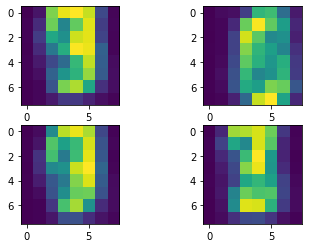

In [11]:
show_plots(x_reconstructed)

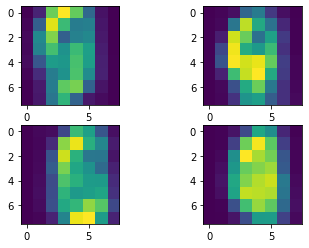

In [12]:
show_plots(x_reconstructed, 1, 2, 3, 4)

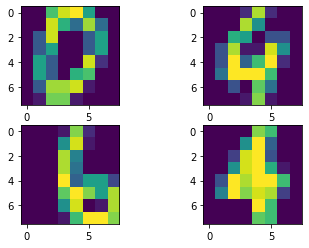

In [13]:
show_plots(X_test.reshape(-1, 8, 8), 1, 2, 3, 4)

# Sklearn Library
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html <br>
https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py

This RBM representation needs to be trained along with a classifier. The sklearn method delivers a condensed representation of the input.

In [14]:
# n_components is the number of hidden units
from sklearn.neural_network import BernoulliRBM
rbm_sklearn = BernoulliRBM(n_components = 100, random_state = 0, verbose = True, learning_rate = 0.06, 
                          n_iter = 10)
logistic = linear_model.LogisticRegression(solver = "newton-cg", tol = 1, C = 6000)
rbm_features_classifier = Pipeline(steps = [("rbm", rbm_sklearn), 
                                            ("logistic", logistic)])

In [15]:
rbm_features_classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.14s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.19s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.19s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.17s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.21s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.18s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.18s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.18s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.19s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.09, time = 0.19s


Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.06, n_components=100,
                              random_state=0, verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000, solver='newton-cg', tol=1))])

In [16]:
# #############################################################################
# Evaluation

Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       174
           1       0.91      0.93      0.92       184
           2       0.95      0.95      0.95       166
           3       0.95      0.89      0.92       194
           4       0.97      0.94      0.95       186
           5       0.92      0.91      0.91       181
           6       0.98      0.97      0.97       207
           7       0.93      0.99      0.96       154
           8       0.88      0.88      0.88       182
           9       0.87      0.91      0.89       169

    accuracy                           0.93      1797
   macro avg       0.93      0.94      0.93      1797
weighted avg       0.94      0.93      0.93      1797




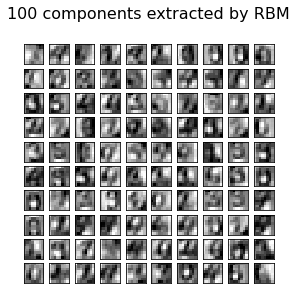

In [18]:
# #############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm_sklearn.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

In [ ]:
# sklearn's rbm doesn't have a built-in method for reconstruction of its representations, so i wrote a custom function.
def compute_visible(algo, hidden: tf.Tensor) -> tf.Tensor:
        """
        Computes visible state from hidden state.
        :param hidden: tensor of shape (batch_size, n_hidden)
        :return: tensor of shape (batch_size, n_visible)
        """
        return tf.nn.sigmoid(tf.matmul(hidden, algo.components_) + algo.intercept_visible_)

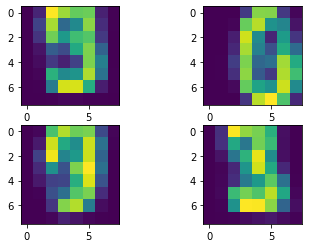

In [74]:
# visualizing rbm-condensed images
reconned_x_test = rbm_sklearn.transform(X_test)
reconned_x = compute_visible(rbm_sklearn, reconned_x_test)
show_plots(reconned_x.numpy().reshape(-1, 8, 8))

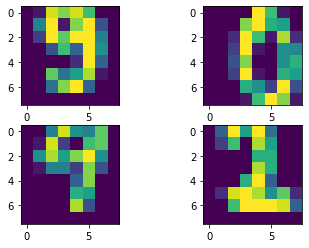

In [20]:
show_plots(X_test.reshape(-1, 8, 8))

# On a bigger dataset

# Sklearn library

In [21]:
big_mnist_train = pd.read_csv('../../data/mnist/train.csv')
big_mnist_test = pd.read_csv('../../data/mnist/test.csv')

In [22]:
big_X_train, big_X_test, big_Y_train, big_Y_test = train_test_split(
    big_mnist_train.drop("label", axis = 1), big_mnist_train["label"], test_size=0.2, random_state=0)

In [23]:
big_X_train = big_X_train / 255.
big_X_test = big_X_test / 255.

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [25]:
rbm_sklearn_big = BernoulliRBM(256, random_state = 0, verbose = True, learning_rate = 0.06, 
                          n_iter = 10)
logistic = linear_model.LogisticRegression(solver = "newton-cg", tol = 1, C = 6000)
rbm_features_classifier_big = Pipeline(steps = [("rbm", rbm_sklearn_big), 
                                            ("logistic", logistic)])

In [26]:
rbm_features_classifier_big.fit(big_X_train, big_Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -88.16, time = 15.37s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -82.44, time = 15.85s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -82.10, time = 15.96s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -79.68, time = 16.62s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -77.63, time = 16.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -76.75, time = 16.34s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -75.91, time = 15.99s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -75.14, time = 16.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -75.46, time = 16.08s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -75.26, time = 16.12s


Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.06, random_state=0,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000, solver='newton-cg', tol=1))])

In [27]:
# Evaluation

Y_pred_big = rbm_features_classifier_big.predict(big_X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(big_Y_test, Y_pred_big)))


Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       813
           1       0.99      0.99      0.99       961
           2       0.95      0.96      0.95       860
           3       0.95      0.93      0.94       863
           4       0.97      0.95      0.96       827
           5       0.95      0.94      0.94       756
           6       0.96      0.97      0.96       841
           7       0.96      0.97      0.96       899
           8       0.92      0.94      0.93       768
           9       0.94      0.93      0.94       812

    accuracy                           0.96      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.96      0.96      0.96      8400




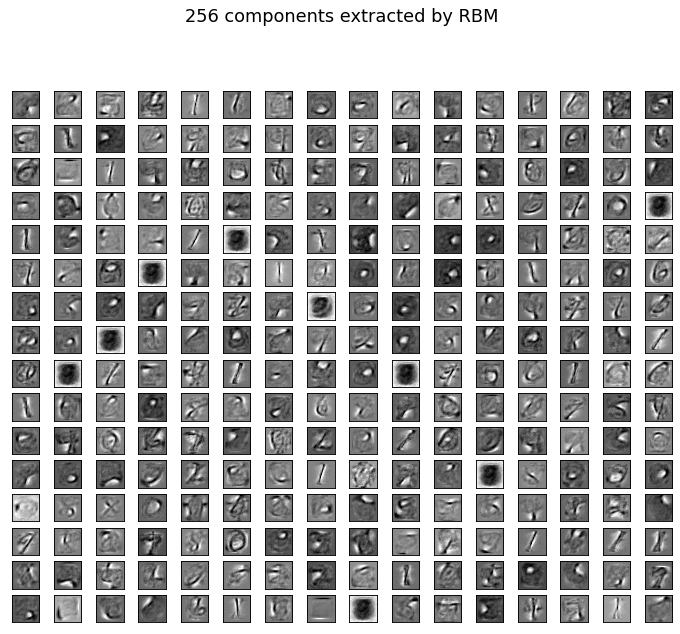

In [89]:
# #############################################################################
# Plotting
# This visualizes features that the RBM has learned. It looks like the RBm has learned to recognize lines, circles, their various shapes and
# orientations. 
plt.figure(figsize=(10, 8), dpi=80)
for i, comp in enumerate(rbm_sklearn_big.components_):
    plt.subplot(16, 16, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('256 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

In [65]:
def compute_visible(algo, hidden: tf.Tensor) -> tf.Tensor:
        """
        Computes visible state from hidden state.
        :param hidden: tensor of shape (batch_size, n_hidden)
        :return: tensor of shape (batch_size, n_visible)
        """
        return tf.nn.sigmoid(tf.matmul(hidden, algo.components_) + algo.intercept_visible_)

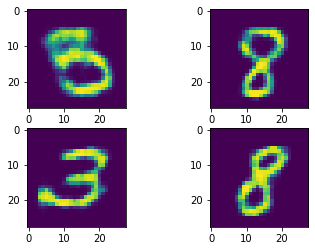

In [71]:
# visualizing condensed images
reconned_x_test_big = rbm_sklearn_big.transform(big_X_test)
reconned_x = compute_visible(rbm_sklearn_big, reconned_x_test_big)
show_plots(reconned_x.numpy().reshape(-1, 28, 28))
# do i not need to transform it back? this is hidden state.

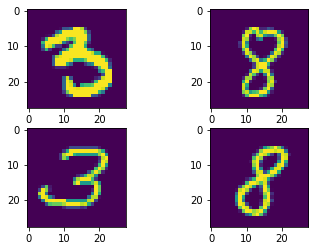

In [31]:
show_plots(big_X_test.values.reshape(-1, 28, 28))

# Tensorflow

In [32]:
#X_train = X_train / 255.
dataset_big  = tf.data.Dataset.from_tensor_slices(big_X_train.astype("float32"))
dataset_big = dataset_big.shuffle(1024, reshuffle_each_iteration = True)

In [44]:
rbm_big_single = BBRBM(n_visible = 28 * 28, n_hidden = 144)
rbm_big_single.fit(dataset_big, epoches = 50, batch_size = 10)

INFO:BBRBM:Starting epoch 0
INFO:BBRBM:Epoch error: 0.119214
INFO:BBRBM:Starting epoch 1
INFO:BBRBM:Epoch error: 0.081569
INFO:BBRBM:Starting epoch 2
INFO:BBRBM:Epoch error: 0.074741
INFO:BBRBM:Starting epoch 3
INFO:BBRBM:Epoch error: 0.069646
INFO:BBRBM:Starting epoch 4
INFO:BBRBM:Epoch error: 0.064753
INFO:BBRBM:Starting epoch 5
INFO:BBRBM:Epoch error: 0.060213
INFO:BBRBM:Starting epoch 6
INFO:BBRBM:Epoch error: 0.056482
INFO:BBRBM:Starting epoch 7
INFO:BBRBM:Epoch error: 0.053548
INFO:BBRBM:Starting epoch 8
INFO:BBRBM:Epoch error: 0.051131
INFO:BBRBM:Starting epoch 9
INFO:BBRBM:Epoch error: 0.049173
INFO:BBRBM:Starting epoch 10
INFO:BBRBM:Epoch error: 0.047580
INFO:BBRBM:Starting epoch 11
INFO:BBRBM:Epoch error: 0.046136
INFO:BBRBM:Starting epoch 12
INFO:BBRBM:Epoch error: 0.044932
INFO:BBRBM:Starting epoch 13
INFO:BBRBM:Epoch error: 0.043829
INFO:BBRBM:Starting epoch 14
INFO:BBRBM:Epoch error: 0.042864
INFO:BBRBM:Starting epoch 15
INFO:BBRBM:Epoch error: 0.041975
INFO:BBRBM:Startin

[0.240048348903656,
 0.239876851439476,
 0.24098634719848633,
 0.24066078662872314,
 0.24341866374015808,
 0.23937171697616577,
 0.24008764326572418,
 0.23917143046855927,
 0.2379418909549713,
 0.23904520273208618,
 0.2412712275981903,
 0.23885487020015717,
 0.24028633534908295,
 0.23793447017669678,
 0.23689621686935425,
 0.2394576221704483,
 0.237783744931221,
 0.24064704775810242,
 0.23855553567409515,
 0.23693163692951202,
 0.23933959007263184,
 0.2402518093585968,
 0.23873157799243927,
 0.2336256057024002,
 0.23836259543895721,
 0.23300287127494812,
 0.2359141707420349,
 0.23520472645759583,
 0.23789894580841064,
 0.23541414737701416,
 0.23567365109920502,
 0.2362665832042694,
 0.23493734002113342,
 0.23506300151348114,
 0.2314348816871643,
 0.23084530234336853,
 0.23274628818035126,
 0.2325795441865921,
 0.23386012017726898,
 0.23117050528526306,
 0.23340995609760284,
 0.22875291109085083,
 0.23234349489212036,
 0.23225508630275726,
 0.2286531776189804,
 0.22885209321975708,
 0.2

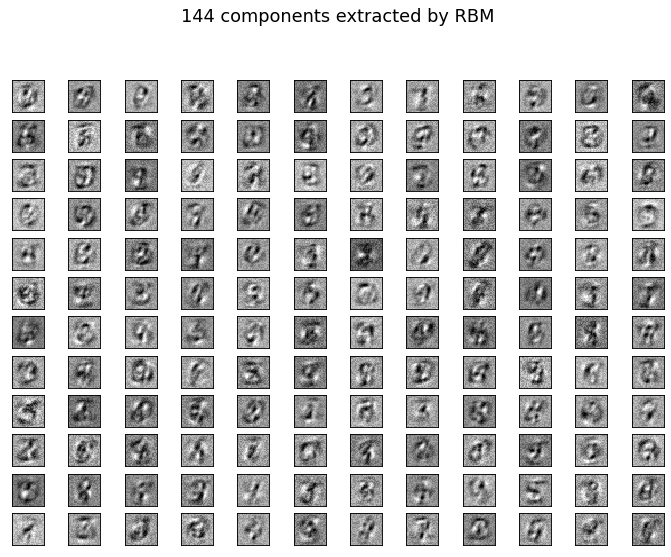

In [84]:
# #############################################################################
# Plotting
# This visualizes features that the RBM has learned. It looks like the RBm has learned to recognize lines, circles, their various shapes and
# orientations. 
plt.figure(figsize=(10, 7), dpi=80)
for i, comp in enumerate(np.transpose(rbm_big_single.w.numpy())):
    plt.subplot(12, 12, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('144 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

In [85]:
x_tensor_big = tf.convert_to_tensor(big_X_test, dtype = tf.float32)
x_reconstructed_tensor_big = rbm_big_single.reconstruct(x_tensor_big) # x – tensor of shape (batch_size, n_visible)
x_reconstructed_big = x_reconstructed_tensor_big.numpy().reshape(-1, 28, 28)

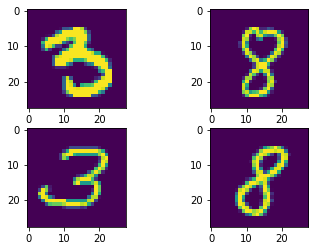

In [80]:
show_plots(big_X_test.values.reshape(-1, 28, 28))

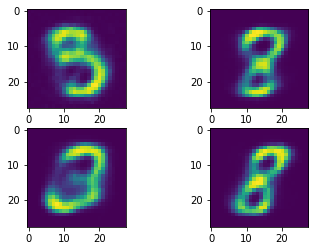

In [46]:
show_plots(x_reconstructed_big)